## Draw molecule

In [1]:
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw
IPythonConsole.ipython_useSVG=True  #< set this to False if you want PNGs instead of SVGs
IPythonConsole.molSize = 300,300

In [13]:
def mol_with_atom_index(mol):
    for atom in mol.GetAtoms():
        atom.SetAtomMapNum(atom.GetIdx())
    return mol

# Test in a indomethacin
mol = Chem.MolFromSmiles("[CH+]1C[CH+][C@H]2C[C@H]2[CH2+]CO1")
# Default
mol

Draw.MolToFile(mol,'images/molecule3.png',(800,600))

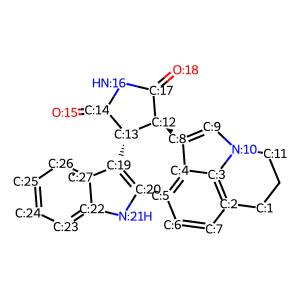

In [3]:
# With atom index
mol_with_atom_index(mol)

[C][C][=C][Branch2][Ring2][C][C][=C][Branch2][Ring1][Ring1][N][Ring1][Branch1][C][=Branch1][C][=O][C][=C][C][=C][Branch1][Branch1][C][=C][Ring1][=Branch1][Cl][C][=C][C][=Branch1][Ring2][=C][Ring1][S][O][C][C][C][=Branch1][C][=O][O]


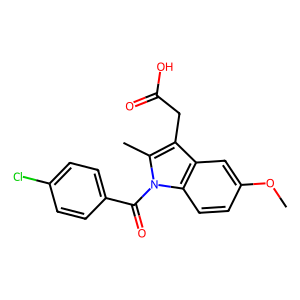

In [4]:
import selfies as sf

indomethacin = "CC1=C(C2=C(N1C(=O)C3=CC=C(C=C3)Cl)C=CC(=C2)OC)CC(=O)O"

# SMILES -> SELFIES -> SMILES translation
try:
    indomethacin_sf = sf.encoder(indomethacin)  # [C][=C][C][=C][C][=C][Ring1][=Branch1]
    indomethacin_smi = sf.decoder(indomethacin_sf)  # C1=CC=CC=C1
except sf.EncoderError:
    pass  # sf.encoder error!
except sf.DecoderError:
    pass  # sf.decoder error!

print(indomethacin_sf)
mol = Chem.MolFromSmiles(indomethacin_smi)

#mol_with_atom_index(mol)
mol

['[=Branch1]', '[=C]', '[=O]', '[Branch1]', '[Branch2]', '[C]', '[Cl]', '[F]', '[N]', '[O]', '[Ring1]', '[Ring2]', '[S]', '[nop]']
[5, 5, 1, 4, 11, 5, 5, 1, 4, 10, 10, 8, 10, 3, 5, 0, 5, 2, 5, 1, 5, 1, 3, 3, 5, 1, 10, 0, 6, 5, 1, 5, 0, 11, 1, 10, 12, 9, 5, 5, 5, 0, 5, 2, 9]
[[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0], [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0], [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0], [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0], [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 1, 0

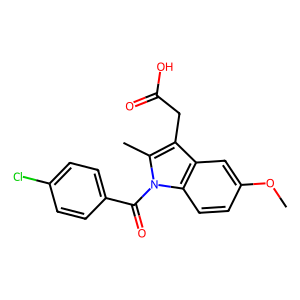

In [5]:
dataset = ["[C][O][C]", "[F][C][F]", "[O][=O]", "[C][C][O][C][C]","[C][C][=C][Branch2][Ring2][C][C][=C][Branch2][Ring1][Ring1][N][Ring1][Branch1][C][=Branch1][C][=O][C][=C][C][=C][Branch1][Branch1][C][=C][Ring1][=Branch1][Cl][C][=C][C][=Branch1][Ring2][=C][Ring1][S][O][C][C][C][=Branch1][C][=O][O]"]
alphabet = sf.get_alphabet_from_selfies(dataset)
alphabet.add("[nop]")  # [nop] is a special padding symbol
alphabet = list(sorted(alphabet))  # ['[=O]', '[C]', '[F]', '[O]', '[nop]']

print(alphabet)

pad_to_len = max(sf.len_selfies(s) for s in dataset)  # 5
symbol_to_idx = {s: i for i, s in enumerate(alphabet)}

dimethyl_ether = dataset[4]

label, one_hot = sf.selfies_to_encoding(
   selfies=dimethyl_ether,
   vocab_stoi=symbol_to_idx,
   pad_to_len=pad_to_len,
   enc_type="both"
)

print(label)
print(one_hot)

selfies = sf.encoding_to_selfies(one_hot, alphabet, "one_hot")
selfies = selfies.replace("[nop]", "")
print(selfies)
print(f"alphabet_len:{len(alphabet)}")
print(f"label:{len(label)}")
print(f"one_hot:{len(one_hot)}")

Chem.MolFromSmiles(sf.decoder(selfies))


[C][C][=C][Branch2][Ring2][C][C][=C][Branch2][Ring1][Ring1][N][Ring1][Branch1][C][=Branch1][C][=O][C][=C][C][=C][Branch1][Branch1][C][=C][Ring1][=Branch1][Cl][C][=C][C][=Branch1][Ring2][=C][Ring1][S][O][C][C][C][=Branch1][C][=O][O]


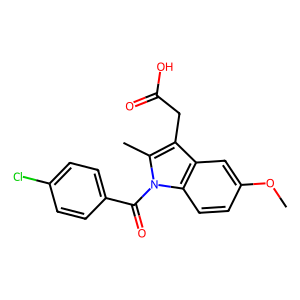

In [6]:
selfies = sf.encoding_to_selfies(label, alphabet, "label")
selfies = selfies.replace("[nop]", "")
print(selfies)

Chem.MolFromSmiles(sf.decoder(selfies))

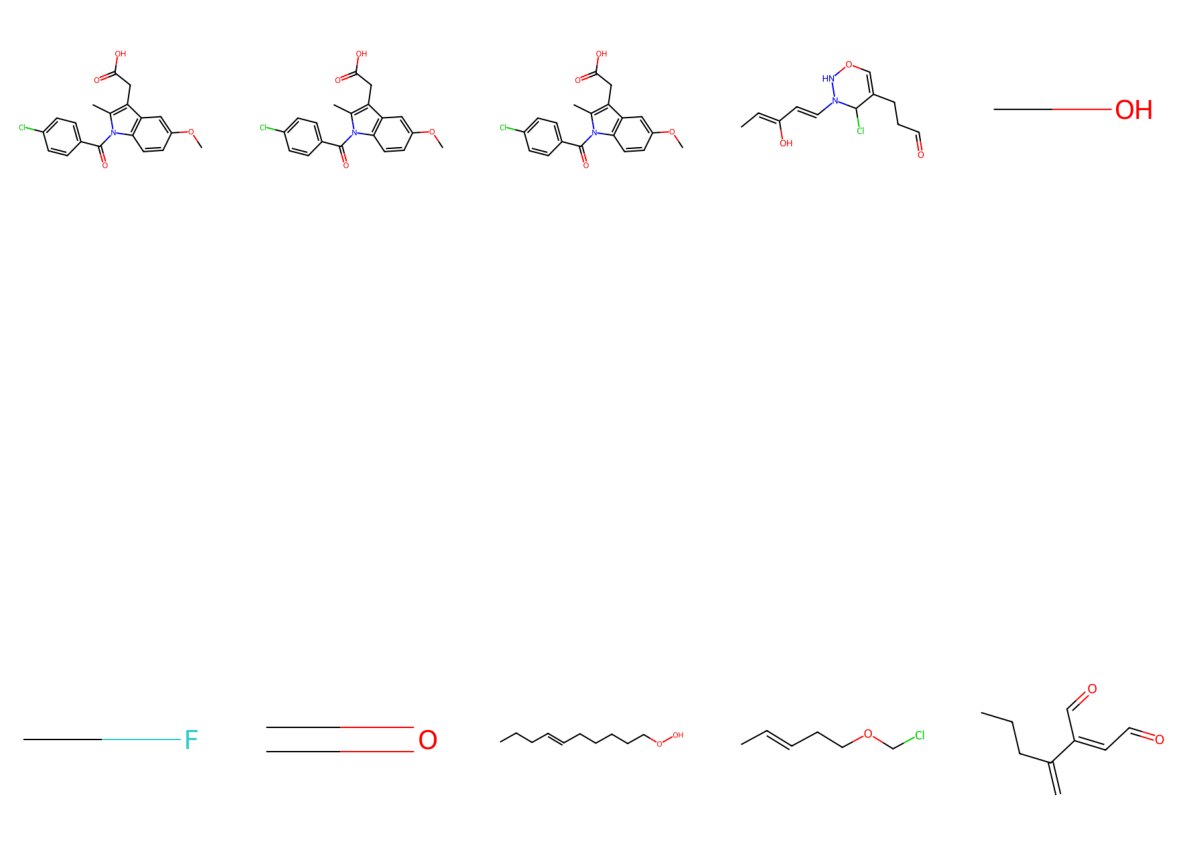

In [7]:
import torch
import matplotlib.pyplot as plt

timesteps = 300
beta_min = 1e-4
beta_max = 2e-2
betas = torch.linspace(beta_min, beta_max, steps=timesteps)
betas_sqrt = torch.sqrt(betas)
alphas = 1 - betas
alphas_sqrt = torch.sqrt(alphas)
alphas_bar = torch.cumprod(alphas,0)
alphas_bar_sqrt = torch.sqrt(alphas_bar)

def add_noise_directly(x_init,t, return_noise=False) :
    mean = alphas_bar_sqrt[t]*x_init
    std = torch.sqrt(1-alphas_bar[t])
    if return_noise :
        noise = torch.randn_like(x_init)
        x = mean + std*noise
        return x, noise
    else:
        x = mean + std*torch.randn_like(x_init)
        return x

figure = plt.figure(figsize=(15, 15))
cols, rows = 5, 2
i = 0

x_init = 2*torch.tensor(one_hot, dtype=torch.float32)-1

for t in range(1, timesteps):
    if (t == 1 or t % 30 == 0 or t == timesteps):
        x = add_noise_directly(x_init,t)
        i+=1
        #one_hot_noised = torch.round(((x + 1)/2)).type(torch.int32)
        #one_hot_noised[one_hot_noised<0] = 0
        #one_hot_noised[one_hot_noised>1] = 1
        one_hot_noised = torch.zeros_like(x).type(torch.int32)
        one_hot_noised[x>0] = 1

        one_hot_noised_cleaned = one_hot_noised[one_hot_noised.sum(dim=1) != 0]
        #alphabet_cleaned = [b for a, b in zip((one_hot_noised.sum(dim=1) != 0).numpy(), alphabet) if a]
        selfies = sf.encoding_to_selfies(one_hot_noised_cleaned.tolist(), alphabet, "one_hot")
        selfies = selfies.replace("[nop]", "")
        mol = Chem.MolFromSmiles(sf.decoder(selfies))
        mol_img = Chem.Draw.MolToImage(mol,size=(300,300))
        figure.add_subplot(rows, cols, i)
        plt.axis("off")
        plt.imshow(mol_img)

x_noised = x

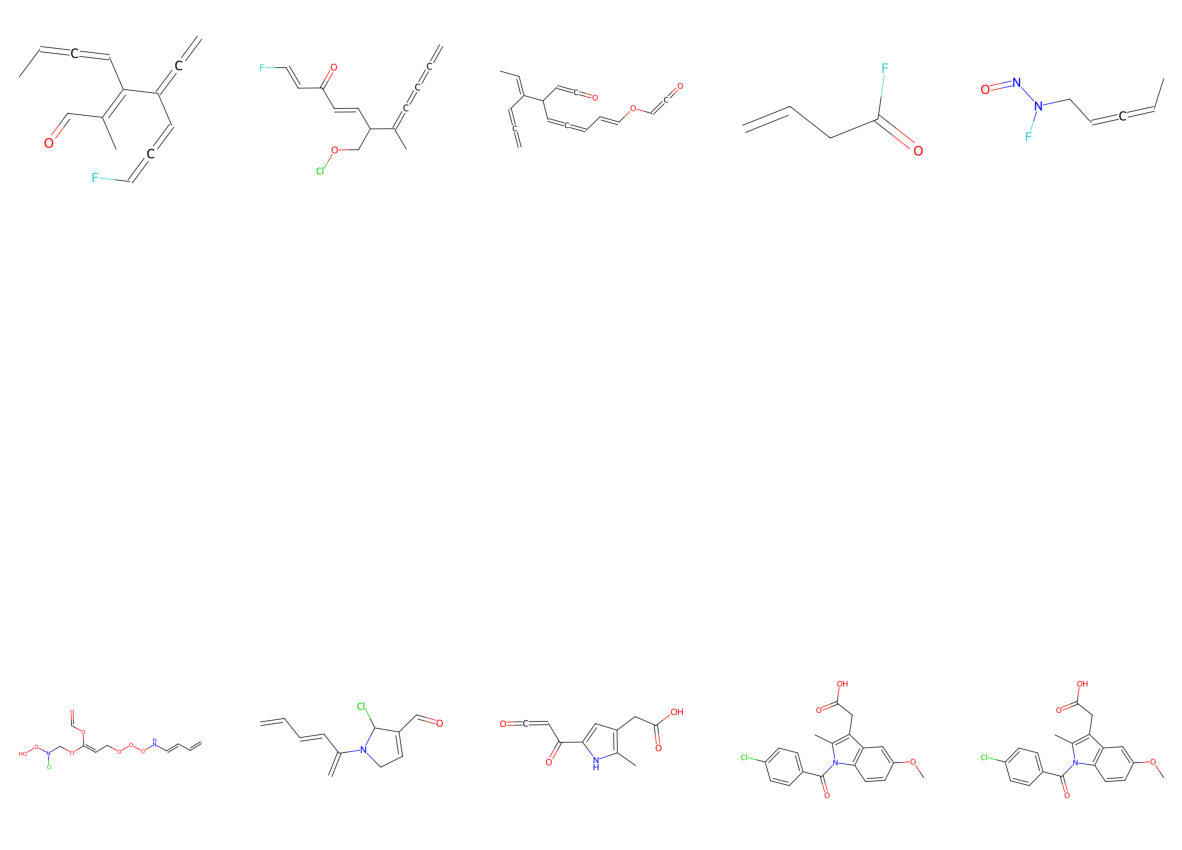

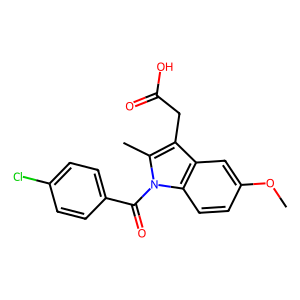

In [8]:
def reverse_step(x_init, x, t) :
    mean = alphas_bar_sqrt[t-1]*betas[t]/(1-alphas_bar[t])*x_init + alphas_sqrt[t]*(1-alphas_bar[t-1])/(1-alphas_bar[t])*x
    std = torch.sqrt((1-alphas_bar[t-1])/((1-alphas_bar[t]))*betas[t])
    return mean + std*torch.randn_like(x_init)

figure = plt.figure(figsize=(15, 15))
cols, rows = 5, 2

#x = torch.randn_like(x_init)
x = x_noised
i = 0
for t in reversed(range(1, timesteps)):
    x = reverse_step(x_init, x, t)
    if (t == 1 or t % 30 == 0):
        i+=1
        #one_hot_noised = torch.round(((x + 1)/2)).type(torch.int32)
        #one_hot_noised[one_hot_noised<0] = 0
        #one_hot_noised[one_hot_noised>1] = 1
        one_hot_noised = torch.zeros_like(x).type(torch.int32)
        one_hot_noised[x>0] = 1
        
        one_hot_noised_cleaned = one_hot_noised[one_hot_noised.sum(dim=1) != 0]
        #alphabet_cleaned = [b for a, b in zip((one_hot_noised.sum(dim=1) != 0).numpy(), alphabet) if a]
        selfies = sf.encoding_to_selfies(one_hot_noised_cleaned.tolist(), alphabet, "one_hot")
        selfies = selfies.replace("[nop]", "")
        mol = Chem.MolFromSmiles(sf.decoder(selfies))
        mol_img = Chem.Draw.MolToImage(mol,size=(600,600))
        figure.add_subplot(rows, cols, i)
        plt.axis("off")
        plt.imshow(mol_img, cmap="gray")

plt.show()
Chem.MolFromSmiles(sf.decoder(selfies))

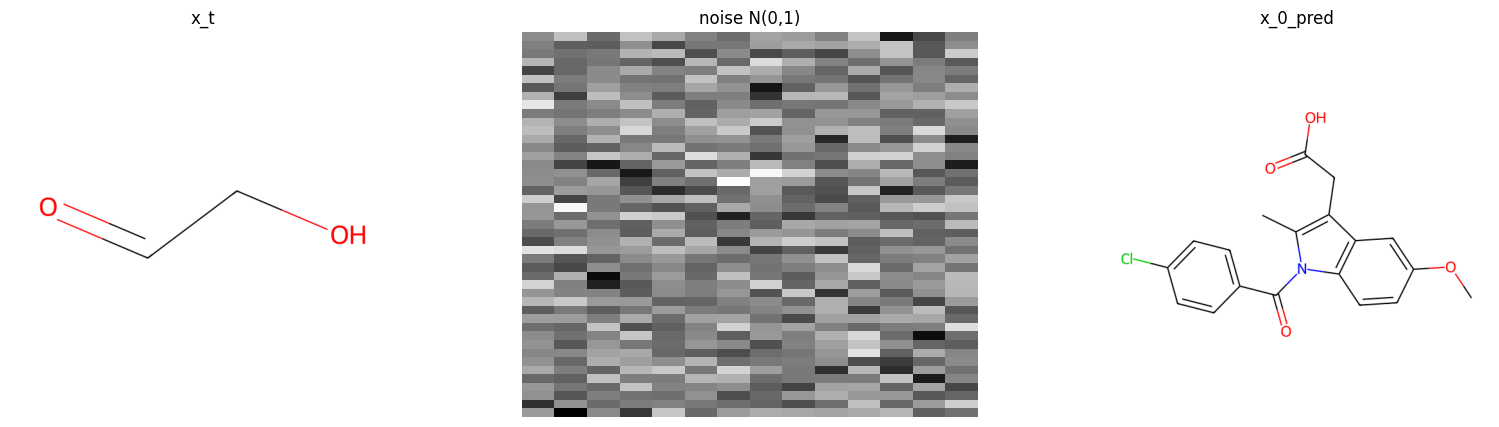

In [9]:
x_t, noise = add_noise_directly(x_init,299, return_noise=True)
x_0_pred=(x_t-(1-alphas_bar[299]).sqrt()*noise)/(alphas_bar_sqrt[299])

figure = plt.figure(figsize=(20, 5))
cols, rows = 3, 1

#one_hot_noised = torch.round(((x_t + 1)/2)).type(torch.int32)
#one_hot_noised[one_hot_noised<0] = 0
#one_hot_noised[one_hot_noised>1] = 1
one_hot_noised = torch.zeros_like(x_t).type(torch.int32)
one_hot_noised[x_t>0] = 1

one_hot_noised_cleaned = one_hot_noised[one_hot_noised.sum(dim=1) != 0]
#alphabet_cleaned = [b for a, b in zip((one_hot_noised.sum(dim=1) != 0).numpy(), alphabet) if a]
selfies = sf.encoding_to_selfies(one_hot_noised_cleaned.tolist(), alphabet, "one_hot")
selfies = selfies.replace("[nop]", "")
mol = Chem.MolFromSmiles(sf.decoder(selfies))
mol_img = Chem.Draw.MolToImage(mol,size=(600,600))
figure.add_subplot(rows, cols, 1)
plt.title('x_t')
plt.axis("off")
plt.imshow(mol_img)
figure.add_subplot(rows, cols, 2)
plt.title('noise N(0,1)')
plt.axis("off")
plt.imshow(noise.squeeze(), cmap="gray", aspect='auto')

#one_hot_noised = torch.round(((x_0_pred + 1)/2)).type(torch.int32)
#one_hot_noised[one_hot_noised<0] = 0
#one_hot_noised[one_hot_noised>1] = 1
one_hot_noised = torch.zeros_like(x_0_pred).type(torch.int32)
one_hot_noised[x_0_pred>0] = 1

one_hot_noised_cleaned = one_hot_noised[one_hot_noised.sum(dim=1) != 0]
#alphabet_cleaned = [b for a, b in zip((one_hot_noised.sum(dim=1) != 0).numpy(), alphabet) if a]
selfies = sf.encoding_to_selfies(one_hot_noised_cleaned.tolist(), alphabet, "one_hot")
selfies = selfies.replace("[nop]", "")
mol = Chem.MolFromSmiles(sf.decoder(selfies))
mol_img = Chem.Draw.MolToImage(mol,size=(600,600))
figure.add_subplot(rows, cols, 3)
plt.title('x_0_pred')
plt.axis("off")
plt.imshow(mol_img)

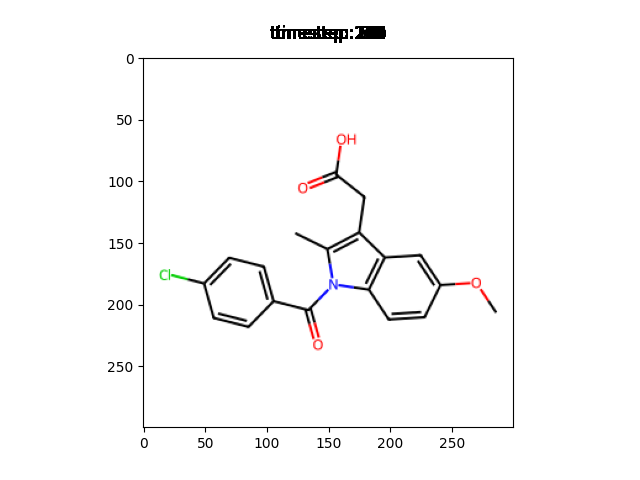

In [10]:
%matplotlib widget
import matplotlib.animation as animation

x = torch.randn_like(x_init)
#x = x_noised
i = 0

#one_hot_noised_last_step = torch.round(((x + 1)/2)).type(torch.int32)
#one_hot_noised_last_step[one_hot_noised<0] = 0
#one_hot_noised_last_step[one_hot_noised>1] = 1
one_hot_noised_last_step = torch.zeros_like(x).type(torch.int32)
one_hot_noised_last_step[x>0] = 1

fig, ax = plt.subplots()

ims = []
for t in reversed(range(1, timesteps)):
    x = reverse_step(x_init, x, t)
    #one_hot_noised = torch.round(((x + 1)/2)).type(torch.int32)
    #one_hot_noised[one_hot_noised<0] = 0
    #one_hot_noised[one_hot_noised>1] = 1
    one_hot_noised = torch.zeros_like(x).type(torch.int32)
    one_hot_noised[x>0] = 1

    diff = one_hot_noised - one_hot_noised_last_step
    if (torch.sum(diff.abs()) > 0 or t == timesteps):
        one_hot_noised_last_step = one_hot_noised
        i+=1
        one_hot_noised_cleaned = one_hot_noised[one_hot_noised.sum(dim=1) != 0]
        #alphabet_cleaned = [b for a, b in zip((one_hot_noised.sum(dim=1) != 0).numpy(), alphabet) if a]
        selfies = sf.encoding_to_selfies(one_hot_noised_cleaned.tolist(), alphabet, "one_hot")
        selfies = selfies.replace("[nop]", "")
        mol = Chem.MolFromSmiles(sf.decoder(selfies))
        mol_img = Chem.Draw.MolToImage(mol,size=(300,300))
        title = ax.text(0.5,1.05,"timestep: {}".format(t), 
                    size=plt.rcParams["axes.titlesize"],
                    ha="center", transform=ax.transAxes, )
        im = ax.imshow(mol_img, animated=True)
        #if i == timesteps:
        #    ax.imshow(mol_img)
        #ims.append([im, title])

#ani = animation.ArtistAnimation(fig, ims, interval=200, blit=True,
#                                repeat_delay=1000)

#plt.show()

## Test with label

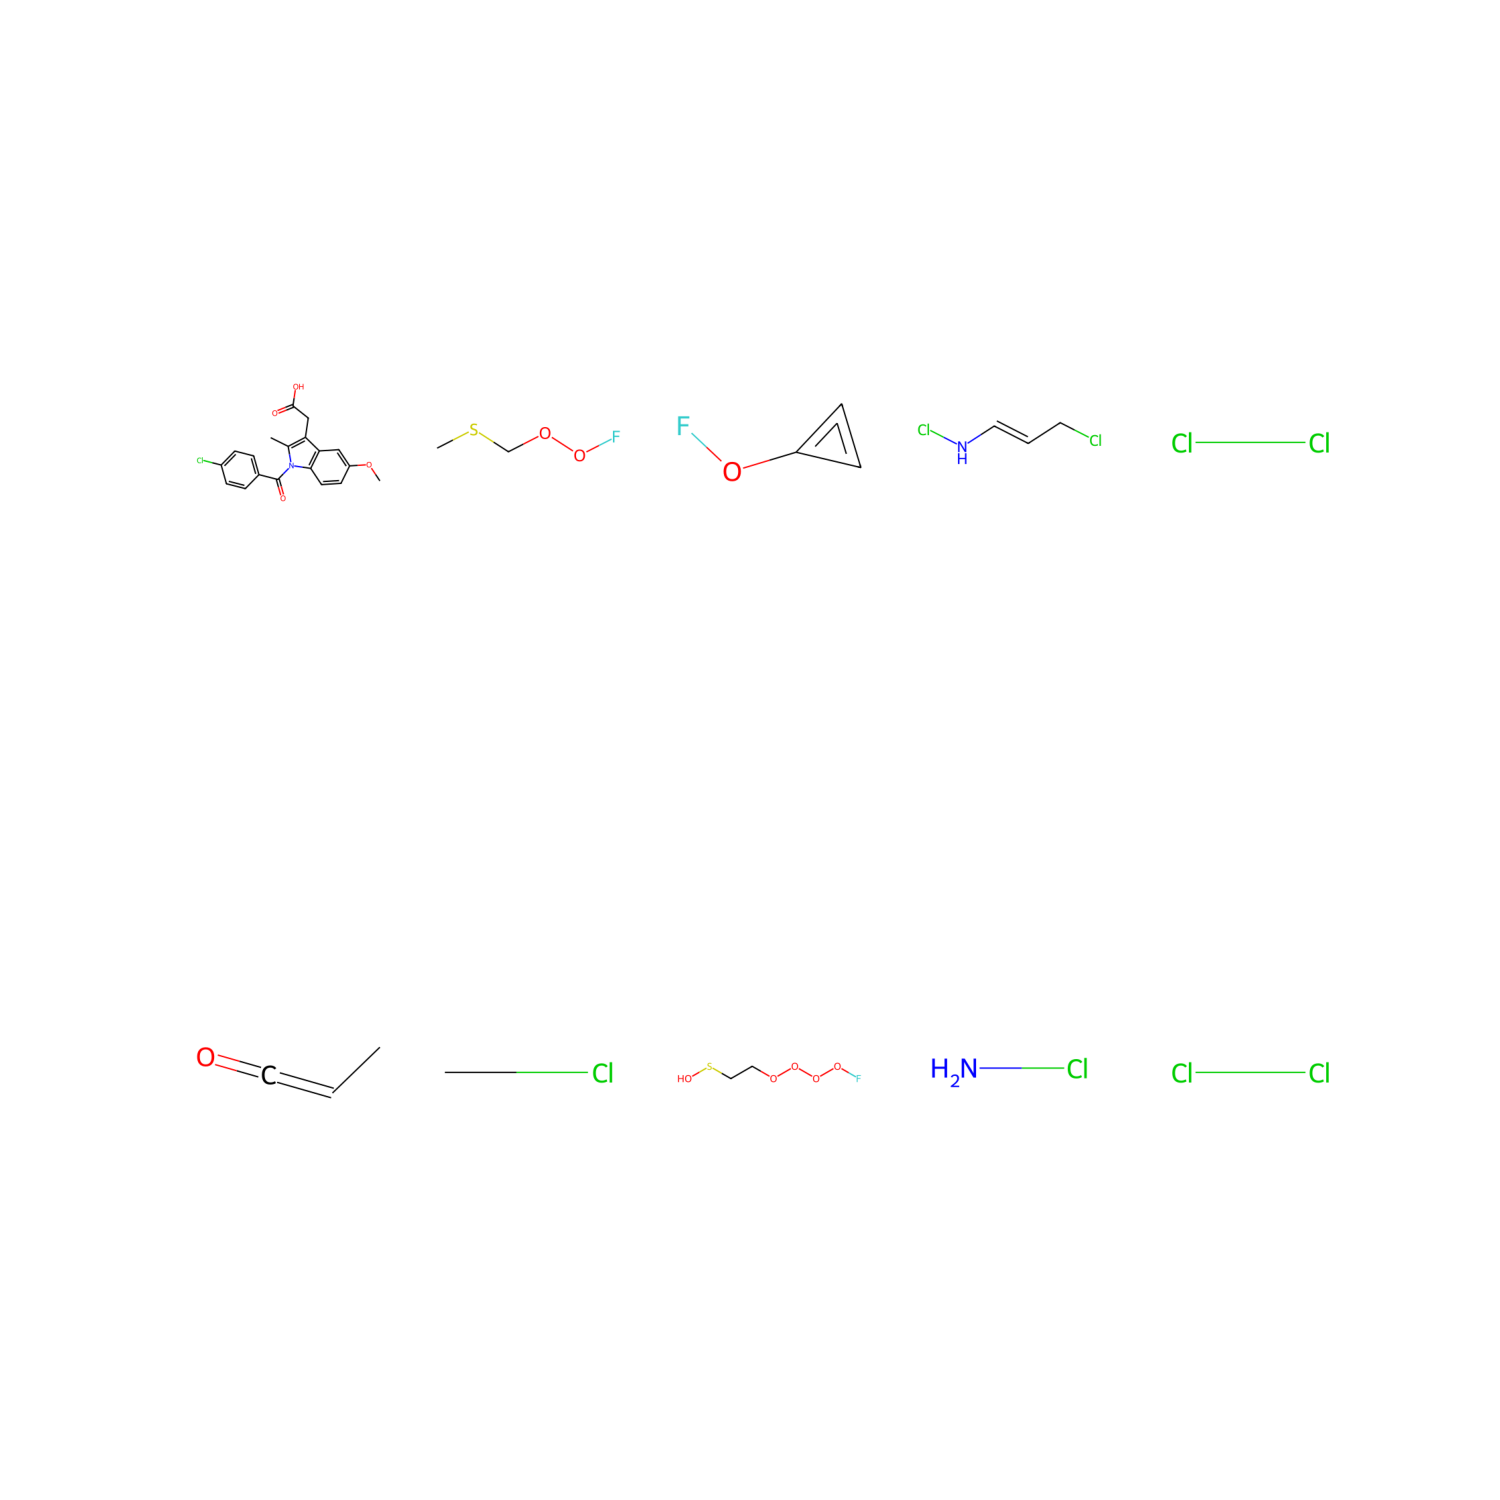

In [11]:
figure = plt.figure(figsize=(15, 15))
cols, rows = 5, 2
i = 0

x_init_int = torch.tensor(label, dtype=torch.int32)
x_init = torch.tensor(label, dtype=torch.float32)
mean, std = torch.mean(x_init), torch.std(x_init)
x_init_norm = (x_init-mean)/std

x = x_init_norm
for t in range(1, timesteps):
    if (t == 1 or t % 30 == 0 or t == timesteps):
        x = add_noise_directly(x,t)
        i+=1
        label_noised = torch.round(x*std+mean).type(torch.int32)
        label_noised[label_noised<x_init_int.min()] = x_init_int.min()
        label_noised[label_noised>x_init_int.max()] = x_init_int.max()

        selfies = sf.encoding_to_selfies(label_noised.tolist(), alphabet, "label")
        selfies = selfies.replace("[nop]", "")
        mol = Chem.MolFromSmiles(sf.decoder(selfies))
        mol_img = Chem.Draw.MolToImage(mol,size=(300,300))
        figure.add_subplot(rows, cols, i)
        plt.axis("off")
        plt.imshow(mol_img)

x_noised = x

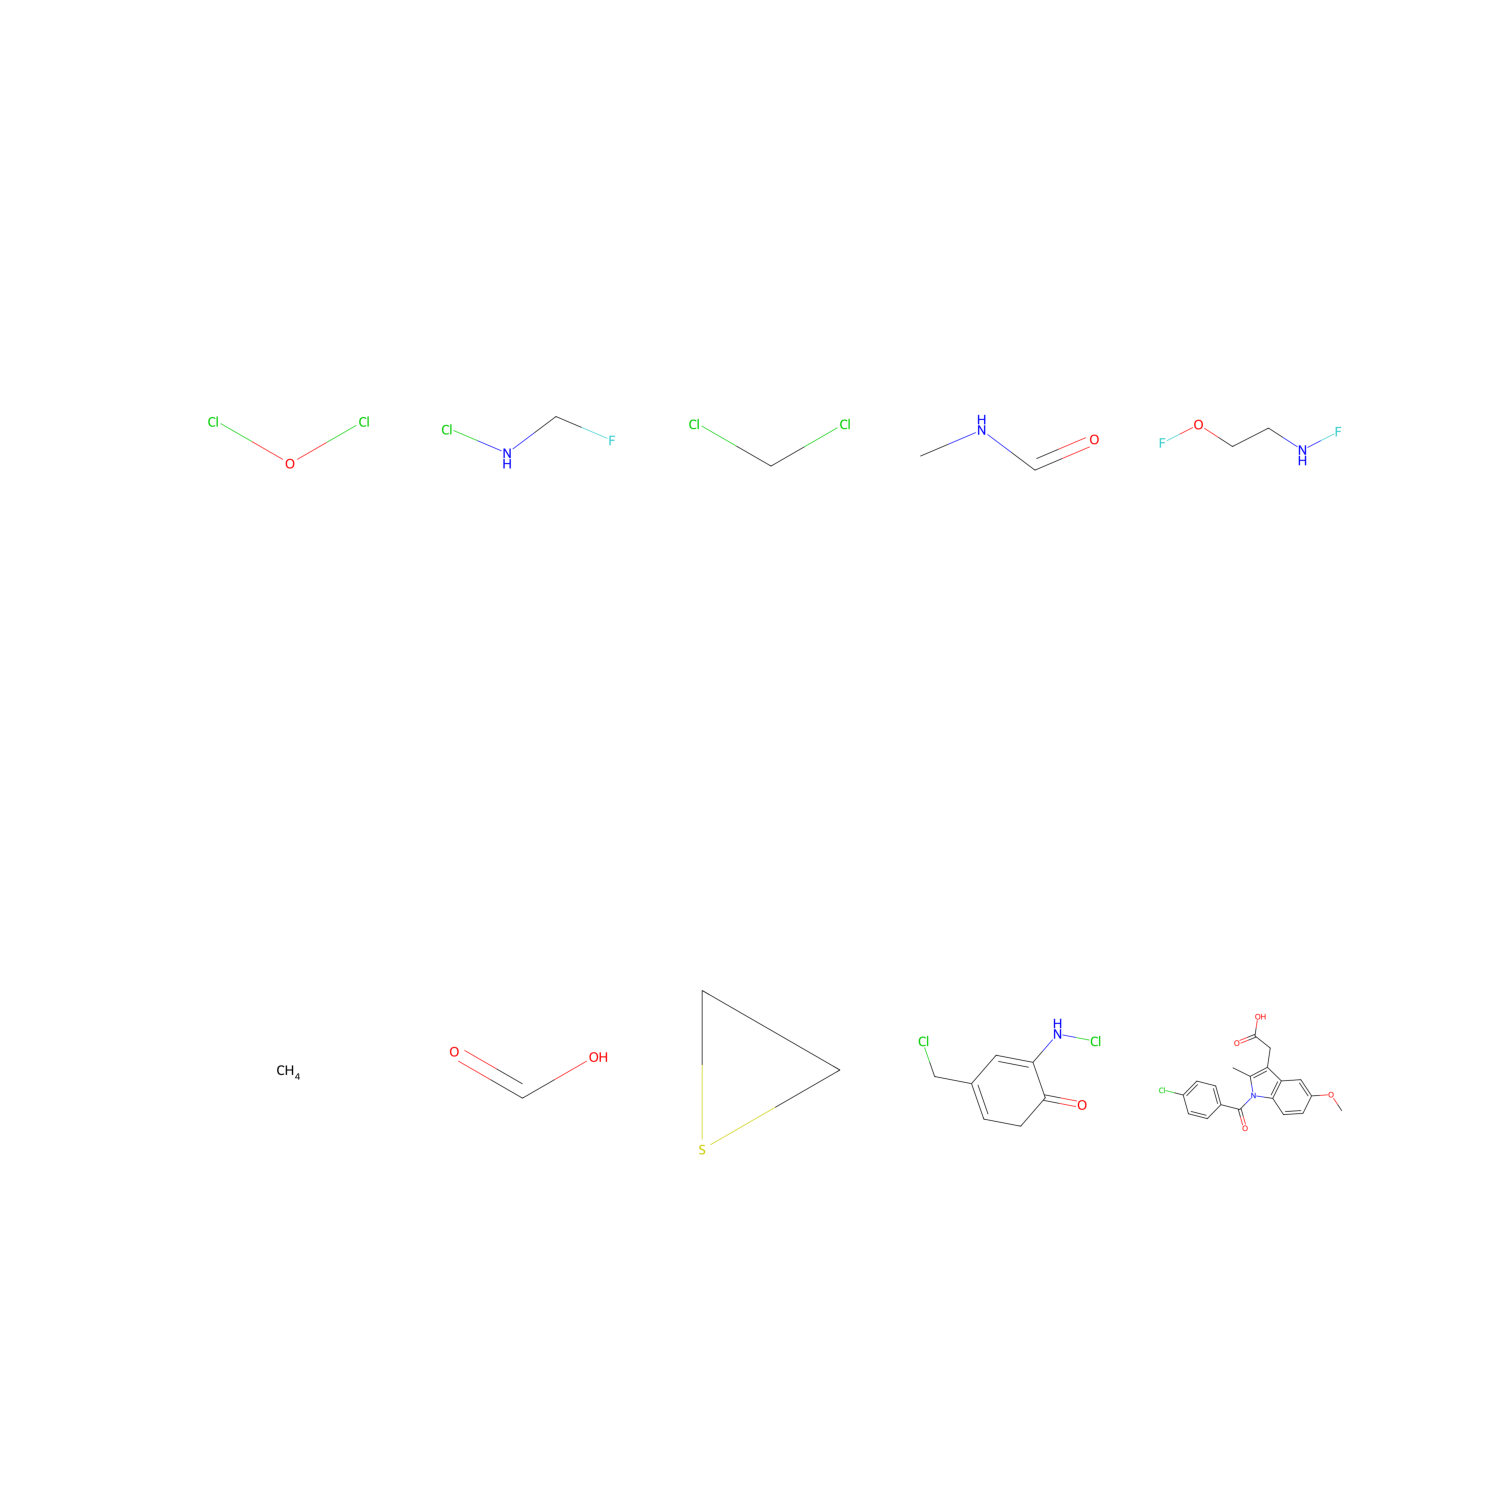

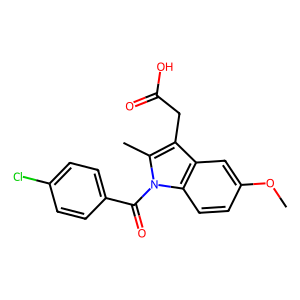

In [12]:
figure = plt.figure(figsize=(15, 15))
cols, rows = 5, 2

#x_noised = torch.randn_like(x_init)
x = x_noised
i = 0
for t in reversed(range(1, timesteps)):
    x = reverse_step(x_init_norm, x, t)
    if (t == 1 or t % 30 == 0):
        i+=1
        label_noised = torch.round(x*std+mean).type(torch.int32)
        label_noised[label_noised<x_init_int.min()] = x_init_int.min()
        label_noised[label_noised>x_init_int.max()] = x_init_int.max()
        
        selfies = sf.encoding_to_selfies(label_noised.tolist(), alphabet, "label")
        selfies = selfies.replace("[nop]", "")
        mol = Chem.MolFromSmiles(sf.decoder(selfies))
        mol_img = Chem.Draw.MolToImage(mol,size=(600,600))
        figure.add_subplot(rows, cols, i)
        plt.axis("off")
        plt.imshow(mol_img, cmap="gray")

plt.show()
Chem.MolFromSmiles(sf.decoder(selfies))

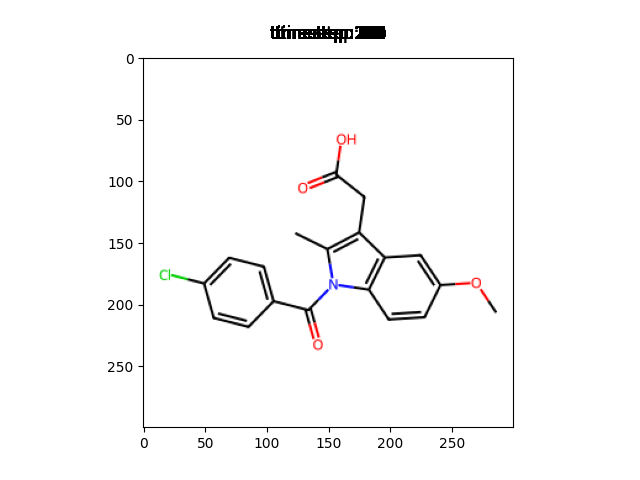

In [13]:
#x_noised = torch.randn_like(x_init_norm)
x = x_noised
i = 0

label_noised_last_step = torch.round(x*std+mean).type(torch.int32)
label_noised_last_step[label_noised_last_step<x_init_int.min()] = x_init_int.min()
label_noised_last_step[label_noised_last_step>x_init_int.max()] = x_init_int.max()

fig, ax = plt.subplots()

ims = []
for t in reversed(range(1, timesteps)):
    x = reverse_step(x_init_norm, x, t)
    label_noised = torch.round(x*std+mean).type(torch.int32)
    label_noised[label_noised<x_init_int.min()] = x_init_int.min()
    label_noised[label_noised>x_init_int.max()] = x_init_int.max()

    diff = label_noised - label_noised_last_step
    if (torch.sum(diff.abs()) > 0 or t == timesteps):
        label_noised_last_step = label_noised
        i+=1

        selfies = sf.encoding_to_selfies(label_noised.tolist(), alphabet, "label")
        selfies = selfies.replace("[nop]", "")
        mol = Chem.MolFromSmiles(sf.decoder(selfies))
        mol_img = Chem.Draw.MolToImage(mol,size=(300,300))
        title = ax.text(0.5,1.05,"timestep: {}".format(t), 
                    size=plt.rcParams["axes.titlesize"],
                    ha="center", transform=ax.transAxes, )
        im = ax.imshow(mol_img, animated=True)
        if i == timesteps:
            ax.imshow(mol_img)
        ims.append([im, title])

ani = animation.ArtistAnimation(fig, ims, interval=200, blit=True,
                                repeat_delay=1000)

plt.show()